In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from matplotlib.ticker import MaxNLocator
from datetime import datetime

## Exploring the downloaded HTML files

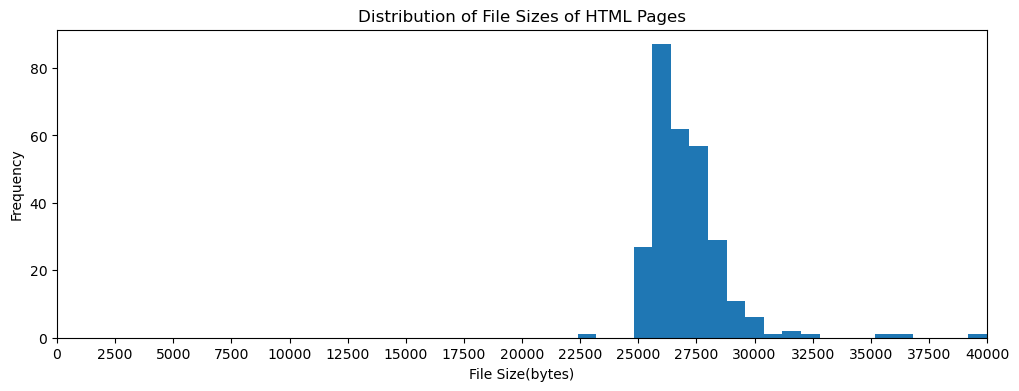

In [118]:
# Plot the distribution of the downloaded HTML file sizes
# Directory of the downloaded HTML pages

if not os.path.exists("figures/"):
    os.mkdir("figures/")

raw_html_dir_path ="data/raw_html"

# Create an empty list to store the file sizes of the HTML pages
file_sizes = []

# Loop through the directory and get the file sizes of the HTML pages
for filename in os.listdir(raw_html_dir_path):
    if filename.endswith('.html'):
        file_path = os.path.join(raw_html_dir_path, filename)
        file_size = os.path.getsize(file_path)
        file_sizes.append(file_size)

# Convert the list to a numpy array
file_sizes = np.array(file_sizes)

# Create a pandas series from the numpy array
file_sizes_series = pd.Series(file_sizes)

# Plot the distribution of file sizes using a histogram
plt.figure(figsize=(12, 4))
plt.hist(file_sizes_series, bins=50, range=(0, 40000))

# Set the x-axis limits and ticks
plt.xlim(0, 40000)
plt.xticks(np.arange(0, 42500, 2500))

# Set the x and y axis labels and title
plt.xlabel('File Size(bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of File Sizes of HTML Pages')

# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('figures/html_file_size.png')

# Show the plot
plt.show()

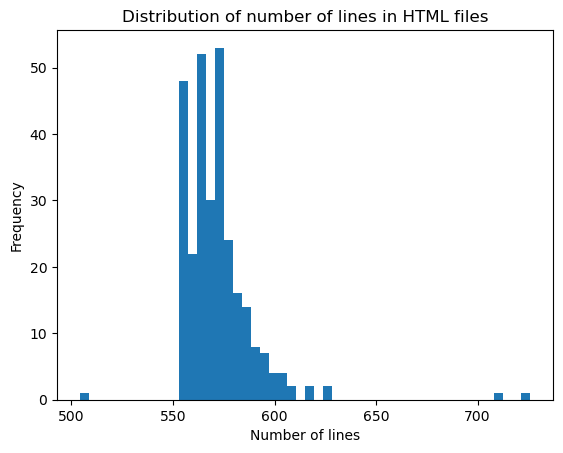

In [119]:
# Plot the distribution of line counts in the downloaded HTML files

if not os.path.exists("figures/"):
    os.mkdir("figures/")
    
raw_html_dir_path ="data/raw_html"   

files = os.listdir(raw_html_dir_path)

# Initialize empty list for number of lines in each file
num_lines = []

# Loop through files and count number of lines in each
for file in files:
    with open(os.path.join(raw_html_dir_path, file), "r", encoding="utf-8") as f:
        num_lines.append(len(f.readlines()))

# Create pandas Series from list of number of lines
num_lines_series = pd.Series(num_lines)

# Plot histogram
plt.hist(num_lines_series, bins=50)
plt.xlabel("Number of lines")
plt.ylabel("Frequency")
plt.title("Distribution of number of lines in HTML files")

# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')

# Show the plot
plt.show()




##  Exploring the processed data

In [120]:
# Compute the number of links in link_list.txt
with open("data/link_list.txt", "r", encoding="utf-8") as f:
    n_collected_links = len(f.readlines()) - 1  # -1 Because of the first line with "id url page".

# Compute the number of the parsed data dictionaries in parsed_data.jsons
with open("data/parsed_data.jsons", "r", encoding="utf-8") as f:
    n_parsed_links = len(f.readlines()) 


print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 291
Number of parsed links: 289


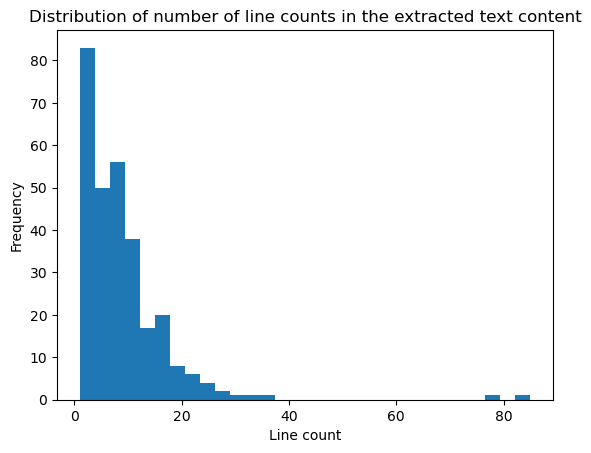

In [121]:
# Plot the distribution of line counts in the extracted text content
line_counts = []
with open('data/parsed_data.jsons') as f:
    for line in f:
        data = json.loads(line)
        content = data['content']
        line_count = len(content.split('\n'))
        line_counts.append(line_count)
        
# Plot histogram
plt.hist(line_counts, bins=30)
plt.xlabel('Line count')
plt.ylabel('Frequency')
plt.title("Distribution of number of line counts in the extracted text content")

#Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

# Show the plot
plt.show()

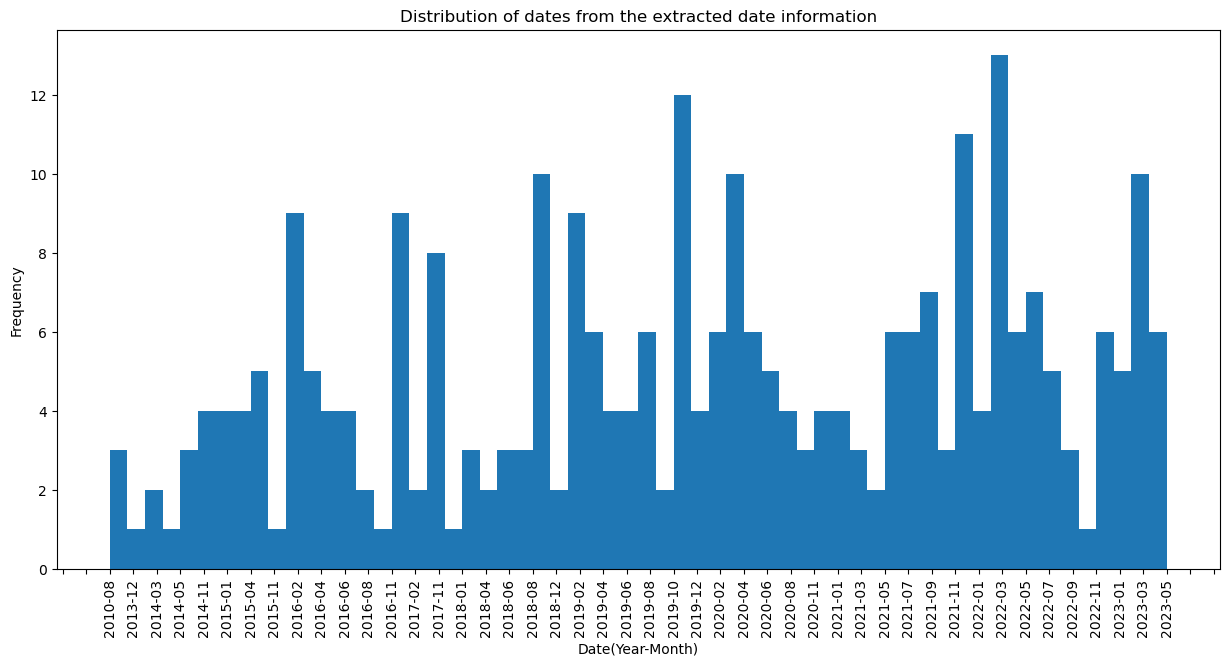

In [122]:
# Plot the distribution of dates from the extracted date information
dates = []

with open('data/parsed_data.jsons') as f:
    for line in f:
        data = json.loads(line)
        date = data['date']
        dates.append(date)
        
year_months = [datetime.strptime(d, '%Y-%m-%d').strftime('%Y-%m') for d in dates]

# Define a custom key function to sort year-month strings
def year_month_key(year_month):
    year, month = year_month.split('-')
    return int(year), int(month)

year_months_sorted = sorted(year_months, key=year_month_key)

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(year_months_sorted, bins=60)
ax.set_xlabel('Date(Year-Month)')
ax.set_ylabel('Frequency')
plt.title("Distribution of dates from the extracted date information")
plt.xticks(rotation=90)

# Use MaxNLocator to control the number of tick intervals
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=60))

# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png',bbox_inches = 'tight')

# Show the plot
plt.show()

